<a href="https://colab.research.google.com/github/data-wonsang/training/blob/master/deep-learning/class_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# seq2seq 번역에서 attention을 계산하는 방식(개념)

# context_vector = attention(query = decoder_output,
#                            keys = encoder_outputs,
#                            values = encoder_outputs
#                            )

In [0]:
# [torch.bmm]
# - 배치 행렬 곱batch matrix multiplication(BMM) 을 수행하는 함수
# - 2개 이상의 차원을 지닌 텐서가 주어졌을 때 뒤의 2개 차원에 대해 행렬 곱을 수행하고 앞의 다른 차원은 미니배치로 취급

import torch

# |x| = (batch_size, n, k)
# |y| = (batch_size, k, m)
z = torch.bmm(x, y)
# |z| = (batch_size, n, m)

In [0]:
# 실제 attention 예시 class

class Attention(nn.Module):

    def __init__(self, hidden_size):
        super(Attention, self).__init__()

        self.linear = nn.Linear(hidden_size, hidden_size, bias=False)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, h_src, h_t_tgt, mask=None):
        # |h_src| = (batch_size, length, hidden_size) : encoder output의 집합
        # |h_t_tgt| = (batch_size, 1, hidden_size) : decoder output의 형태
        # |mask| = (batch_size, length)

        query = self.linear(h_t_tgt.squeeze(1)).unsqueeze(-1)
        # |h_t_tgt| = (batch_size, 1, hidden_size) : decoder output의 형태
        # |query| = (batch_size, hidden_size, 1) : decoder output을 encoder output과 곱해서 가중치를 계산해야하는데, 그러기위해서 차원 변환을 해주는것

        weight = torch.bmm(h_src, query).squeeze(-1)
        # |weight| = (batch_size, length)

        if mask is not None:
            # Set each weight as -inf, if the mask value equals to 1.
            # Since the softmax operation makes -inf to 0,
            # masked weights would be set to 0 after softmax operation.
            # Thus, if the sample is shorter than other samples in mini-batch,
            # the weight for empty time-step would be set to 0.
            weight.masked_fill_(mask, -float('inf'))
        weight = self.softmax(weight)

        context_vector = torch.bmm(weight.unsqueeze(1), h_src)
        # |context_vector| = (batch_size, 1, hidden_size)

        return context_vector
        # 여기서 나온 context_vector와 decoder_output 합쳐서 실제 output 계산에 활용한다! 

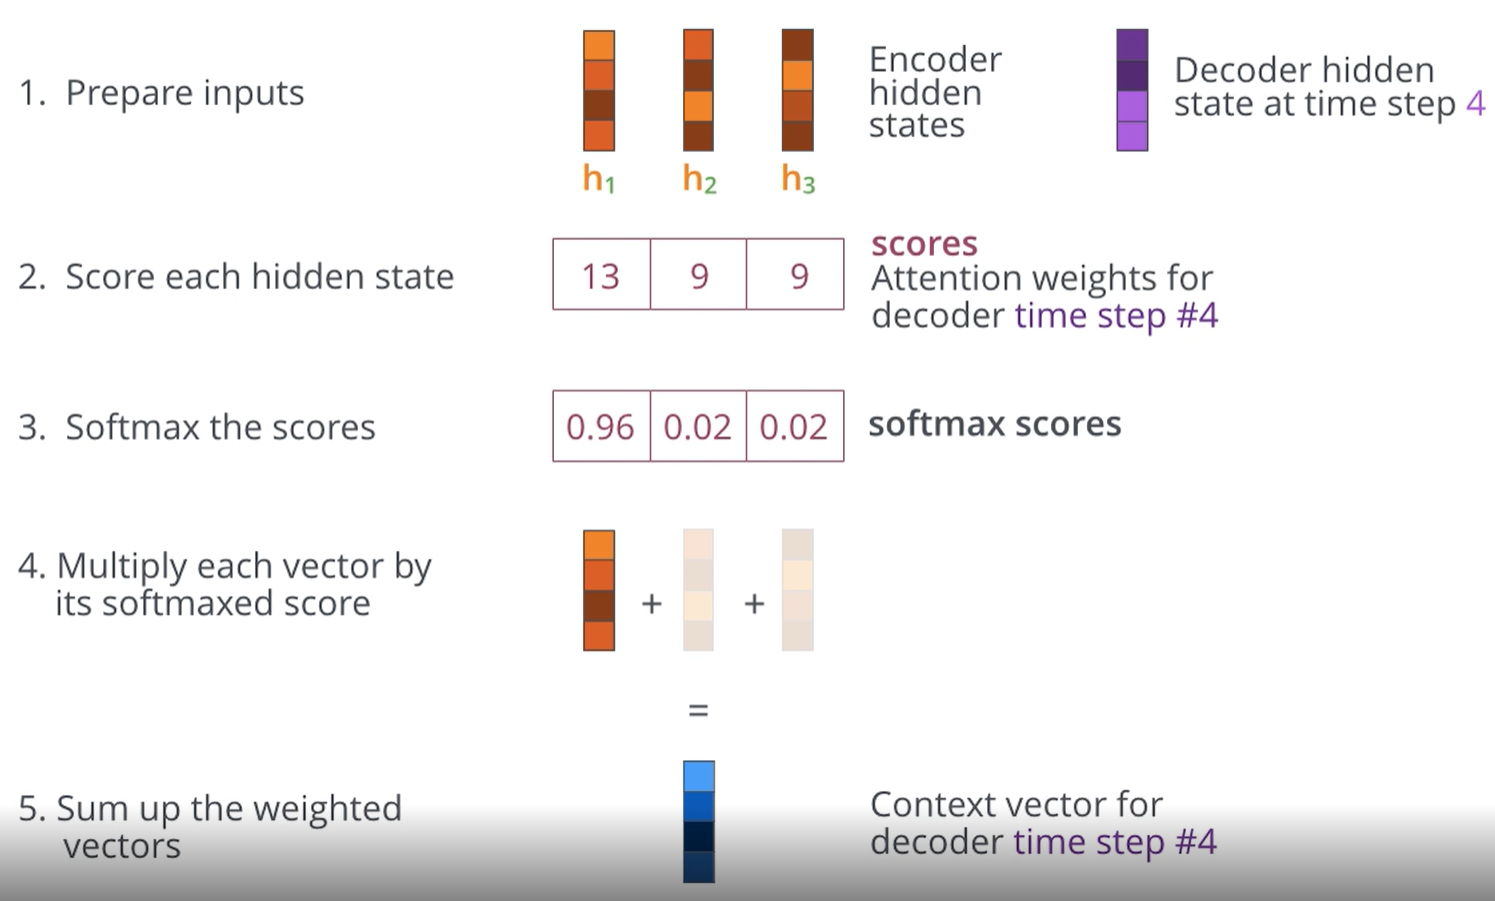

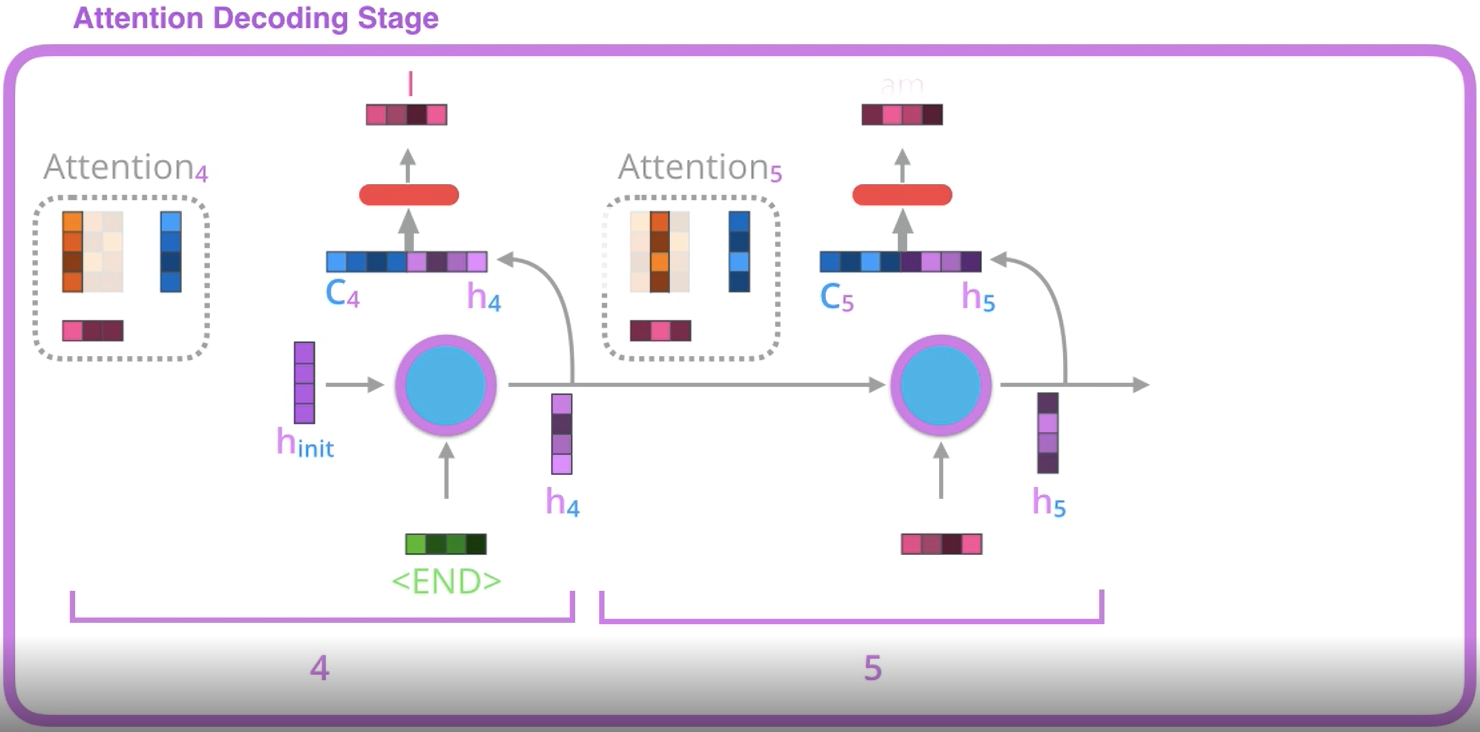